# EDA and preprocessing 1

### Imports

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.preprocessing.feature_scale import EncodingContext, LabelEncodingStrategy
from src.preprocessing.feature_engineering import FeatureEngineeringContext, TransactionVelocityStrategy, BalanceChangeStrategy, AmountBalanceRatioStrategy

In [2]:
data_path = "../data/raw/PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(data_path)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Normal EDA

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
# Reducing the sample size to 300,000 rows while including all fraud and the flagged fraud cases to avoid class imbalance
fraud_cases = data[(data["isFlaggedFraud"] == 1) | (data["isFraud"] == 1)]
non_fraud_cases = data[(data["isFlaggedFraud"] == 0) & (data["isFraud"] == 0)].sample(n=300000 - len(fraud_cases), random_state=42)

# Concatenate the fraud and non-fraud cases
data = pd.concat([fraud_cases, non_fraud_cases])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4169053,304,CASH_OUT,105285.52,C1287319352,3049.00,0.00,C270638673,142456.32,247741.84,0,0
1002149,45,PAYMENT,17396.78,C687538485,0.00,0.00,M2048262049,0.00,0.00,0,0
241805,14,CASH_IN,181930.22,C234956110,5466706.55,5648636.77,C1140283991,393631.67,211701.44,0,0
1099584,130,CASH_IN,68668.25,C322711278,2704007.61,2772675.85,C2146736071,1251847.48,1183179.23,0,0


In [9]:
data[data['type'] == 'CASH_OUT'].index

Index([      3,     252,     681,     724,     970,    1116,    1870,    1911,
          2302,    3060,
       ...
       5470073, 6254690,  276545, 5454023,  301596, 6195518, 3635780, 4808752,
       3001662, 4169053],
      dtype='int64', length=106717)

In [42]:
data.loc[3].type

np.float64(1.0)

In [11]:
data[data['type'] == 'TRANSFER'].index

Index([      2,     251,     680,     969,    1115,    1869,    2301,    3059,
          3162,    3271,
       ...
       4443014, 5798438,   43593, 3921415, 3870533, 2924272, 2684837, 2048195,
       3525861, 6029365],
      dtype='int64', length=28490)

In [40]:
data.loc[2].type

np.float64(4.0)

In [13]:
data[data['type'] == 'PAYMENT'].index

Index([1350600, 1991933, 5092368, 4400356, 1923494, 1878694, 1970576, 6062236,
       4394814, 5132080,
       ...
       2675041, 3594729,  669989,  980024, 4706527, 3762344, 5790608, 3350838,
       1002149,   13998],
      dtype='int64', length=99042)

In [38]:
data.loc[1350600].type

np.float64(3.0)

In [15]:
data[data['type'] == 'CASH_IN'].index

Index([5066515, 4841646,  291123, 4764113,  726834, 1292147,  314180, 4998242,
       1001048, 5111141,
       ...
        926172, 4571294, 6057459, 1590459, 2976393, 2799083, 2320999, 3123458,
        241805, 1099584],
      dtype='int64', length=63820)

In [37]:
data.loc[5066515].type

np.float64(0.0)

In [35]:
data.loc[291123].type

np.float64(0.0)

In [33]:
data[data['type'] == 'DEBIT'].index

Index([], dtype='int64')

In [36]:
data.loc[846906].type

np.float64(2.0)

In [22]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    299984
1        16
Name: count, dtype: int64

In [23]:
data["isFraud"].value_counts()

isFraud
0    291787
1      8213
Name: count, dtype: int64

In [24]:
data["type"].value_counts()

type
CASH_OUT    106717
PAYMENT      99042
CASH_IN      63820
TRANSFER     28490
DEBIT         1931
Name: count, dtype: int64

C:\Users\Geeneth\AppData\Local\Temp\ipykernel_20860\860961779.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['isFraud'], sort = True)


Text(0, 0.5, 'Frequency')

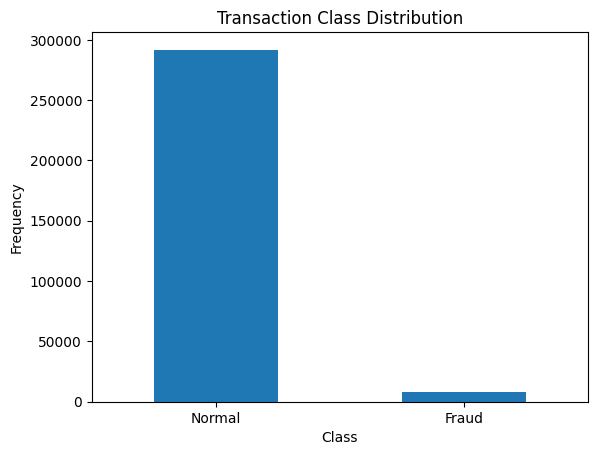

In [25]:
# Visualizing the class imbalance
count_classes = pd.value_counts(data['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [26]:
fraud = data[data['isFraud']==1]
normal = data[data['isFraud']==0]

In [27]:
print(fraud.shape,normal.shape)

(8213, 11) (291787, 11)


### Scaling the data

In [28]:
# Apply Label Encoding to 'type' column
encoder = EncodingContext(LabelEncodingStrategy())
data = encoder.apply_encoding(data, "type")

In [29]:
# Drop unnecessary columns
data = data.drop(["nameOrig", "nameDest"], axis=1)

In [30]:
# Normalize amount values
data["amount"] = (data["amount"] - data["amount"].min()) / (data["amount"].max() - data["amount"].min())

In [27]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,4,0.000003,181.0,0.0,0.0,0.0,1,0
3,1,1,0.000003,181.0,0.0,21182.0,0.0,1,0
251,1,4,0.000040,2806.0,0.0,0.0,0.0,1,0
252,1,1,0.000040,2806.0,0.0,26202.0,0.0,1,0
680,1,4,0.000288,20128.0,0.0,0.0,0.0,1,0


### Feature engineering

In [19]:
# Apply Feature Engineering Strategies
data = FeatureEngineeringContext(TransactionVelocityStrategy()).apply(data)
data = FeatureEngineeringContext(BalanceChangeStrategy()).apply(data)
data = FeatureEngineeringContext(AmountBalanceRatioStrategy()).apply(data)

In [20]:
data[["transaction_count", "balance_change", "amount_balance_ratio"]].head()

,transaction_count,balance_change,amount_balance_ratio
2,144,-1.0,1.430887e-08
3,144,-1.0,1.430887e-08
251,144,-1.0,1.430887e-08
252,144,-1.0,1.430887e-08
680,144,-1.0,1.430887e-08


### Correlation heat map

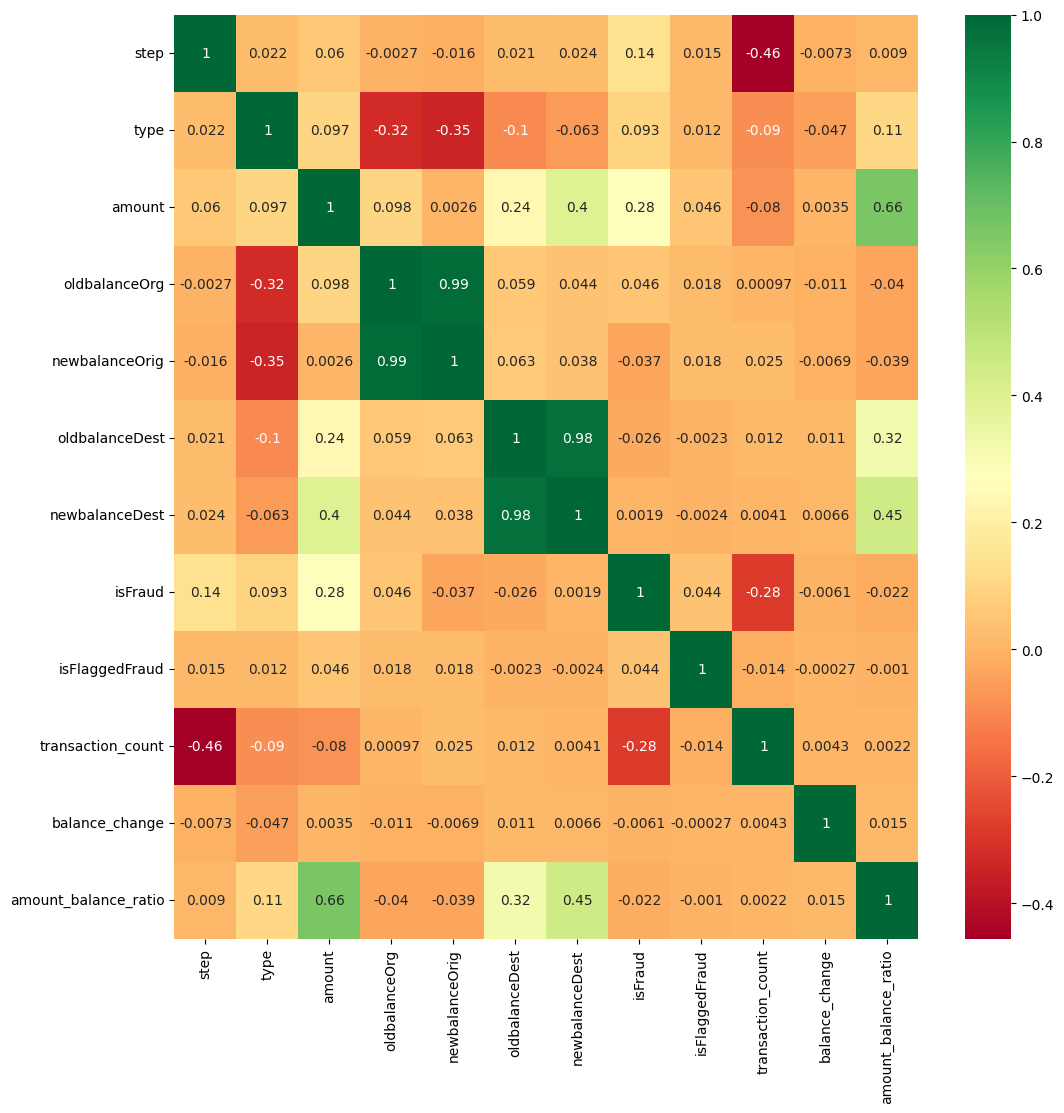

In [21]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_count,balance_change,amount_balance_ratio
2,1,4,0.000003,181.00,0.00,0.00,0.00,1,0,144,-1.000000,1.430887e-08
3,1,1,0.000003,181.00,0.00,21182.00,0.00,1,0,144,-1.000000,1.430887e-08
251,1,4,0.000040,2806.00,0.00,0.00,0.00,1,0,144,-1.000000,1.430887e-08
252,1,1,0.000040,2806.00,0.00,26202.00,0.00,1,0,144,-1.000000,1.430887e-08
680,1,4,0.000288,20128.00,0.00,0.00,0.00,1,0,144,-1.000000,1.430887e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
4169053,304,1,0.001507,3049.00,0.00,142456.32,247741.84,0,0,1186,-1.000000,4.941019e-07
1002149,45,3,0.000249,0.00,0.00,0.00,0.00,0,0,838,0.000000,2.489282e+01
241805,14,0,0.002603,5466706.55,5648636.77,393631.67,211701.44,0,0,2016,0.033280,4.761945e-10
1099584,130,0,0.000983,2704007.61,2772675.85,1251847.48,1183179.23,0,0,1550,0.025395,3.633736e-10


### Saving the dataset

In [23]:
data.to_csv("../data/processed/processed_data.csv", index=False)